In [249]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import datasets, svm
'''
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()
'''

"\niris = datasets.load_iris()\nX = iris.data\ny = iris.target\n\nX = X[y != 0, :2]\ny = y[y != 0]\n\nn_sample = len(X)\n\nnp.random.seed(0)\norder = np.random.permutation(n_sample)\nX = X[order]\ny = y[order].astype(np.float)\n\nX_train = X[:int(.9 * n_sample)]\ny_train = y[:int(.9 * n_sample)]\nX_test = X[int(.9 * n_sample):]\ny_test = y[int(.9 * n_sample):]\n\n# fit the model\nfor kernel in ('linear', 'rbf', 'poly'):\n    clf = svm.SVC(kernel=kernel, gamma=10)\n    clf.fit(X_train, y_train)\n\n    plt.figure()\n    plt.clf()\n    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,\n                edgecolor='k', s=20)\n\n    # Circle out the test data\n    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',\n                zorder=10, edgecolor='k')\n\n    plt.axis('tight')\n    x_min = X[:, 0].min()\n    x_max = X[:, 0].max()\n    y_min = X[:, 1].min()\n    y_max = X[:, 1].max()\n\n    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]\n    Z = clf.dec

In [250]:
UP = []
DOWN = []

def count_words(original_string, bag_of_words):
    split_string = original_string.lower().split()
    count = 0
    for word in bag_of_words:
        matches = split_string.count(word)
        count += matches
    ratio = count/len(split_string)
    return ratio
    
def aggregate_jsons(json_list):
    result = []
    for json in json_list:
        headline = json["title"]
        desc = json["description"]
        x = headline + " " + desc
        result.append(x)
    return result

def pipeline(df_path, ticky):
    # get the dataframe from csv
    df = pd.read_csv(df_path)
    
    # fix dates
    df["Date"] = df["Date"].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True))
    df["Start"] = df["Date"].apply(str)
    six_days = lambda start_date: start_date + datetime.timedelta(days=6)
    df["End"] = df["Date"].apply(six_days).apply(str)
    df = df.drop(columns=["Date"])
    remove_time = lambda dt: dt[0:10]
    df["Start"] = df["Start"].apply(remove_time)
    df["End"] = df["End"].apply(remove_time)
    
    # add json
    client = TiingoClient({"api_key": "a265fc4a1013923f970d16e7348195074e97fcb0"})
    query_ticker = lambda t, s, e: client.get_news(tickers=[t], startDate=s, endDate=e)
    df["JSON"] = df.apply(lambda d: query_ticker(ticky, d["Start"], d["End"]), axis=1)
    
    # create corpus
    df["corpus"] = df["JSON"].apply(aggregate_jsons)
    df["vectorized"] = df["corpus"]
    combinatric = lambda l: ''.join(l)
    df["corpus"] = df["vectorized"].apply(combinatric)
    indicoio.config.api_key = "25b83c4c388204edd2c6c11cd907e048"
    # add sentiment
    df["sentiment"] = df["corpus"].apply(lambda orig: TextBlob(orig).sentiment.polarity)
    df["sentiment_test"] = df["vectorized"].apply(lambda orig: [TextBlob(o).sentiment.polarity for o in orig]).apply(np.mean)
    #df["indico_sentiment"] = df["corpus"].apply(lambda text: indicoio.sentiment_hq(text))
    # add statistical features
    # df["features"] = df["corpus"].apply(lambda text: indicoio.text_features(text, v=2))
    
    # add bag of words ratio
    #df["bad_ratio"] = 
    #df["good_keywords"]
    
    # return the nice beautiful dataframe
    df.to_csv('data/6m-weekly/aapl-6m-weekly.csv')
    return df

a = pipeline('data/6m-weekly/aapl-6m-weekly.csv', 'aapl')

In [293]:
def predictor(d, ticky):
    from sklearn.model_selection import train_test_split

def logistic_accuracy(y_pred, y_real):
    y_pred, y_real = list(y_pred), list(y_real)
    ct = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_real[i]:
            ct += 1
    return ct/len(y_pred)

    
def predictor_two(d, ticky):
    import matplotlib.pyplot as plot
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.naive_bayes import GaussianNB
    from sklearn import utils
    from sklearn import datasets, svm
    from sklearn.model_selection import train_test_split
    d["lastweek"] = d["Close"]
    d.lastweek = d.lastweek.shift(7) ## shift down
    #df.lastweek.drop(df.gdp.shape[0] - 1,inplace = True) ## removing the first row
    #X = np.c_[np.array(d["Open"]), np.array(d["indico_sentiment"])]
    #print(d.head())
    #X = impute(d[["sentiment", "indico_sentiment"]])
    #Y = d["Adj Close"]
    #Y = (Y - d["lastweek"]) > 0
    #y = Y
    difs = d["Open"] - d["Close"]
    y = pd.Series([1 if dif < 0 else 0 for dif in difs])
    d["triangle"] = y
    #dataframe_xy = pd.DataFrame({'Open':d["Open"], 'sentiment':d["sentiment"], 'Y':Y})
    Y = d["triangle"]
    #print(X)
    #print("X length:")
    #print(X.size)
    #print(Y)
    #print("Y length:")
    #print(Y.size)
    #scaler = MinMaxScaler()
    #scaler.fit(d["Open"])
    #scaler.transform(d["Open"])
    d["Open"] = d["Open"] / d["Open"].max()
    d["lastweek"] = d["lastweek"] / d["lastweek"].max()
    #X = impute(d[[ "lastweek"]])
    X = np.zeros((27, 2))
    Y = d["triangle"]
    #print(X)
    #print(Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 69)
    # import some data to play with

    clf = svm.SVC()

    # Create an instance of Logistic Regression Classifier and fit the data.
    #print(X_train)
    #print(Y_train)
    clf.fit(X_train, Y_train)

    plt.figure()
    plt.clf()
    '''
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    '''

    plt.axis('tight')
    '''
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    print(X_train.shape[1])
    print(X_test.shape[1])
    '''
    #print("X train!!!")
    #print(X_train)
    #print("X test!")
    #print(X_test)
    ''''
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z,
                linestyles=['--', '-', '--'])

    plt.title('linear')
    '''
    Y_predicted = clf.predict(X_test)
    error_pct = logistic_accuracy(Y_predicted, Y_test)
    print("****************** THIS IS THE ERROR PERCENT *******************")
    print(error_pct)
    #plt.show()

def impute(X):
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp = imp.fit(X)
    X = imp.transform(X)
    return X

****************** THIS IS THE ERROR PERCENT *******************
0.7142857142857143


/home/ric/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


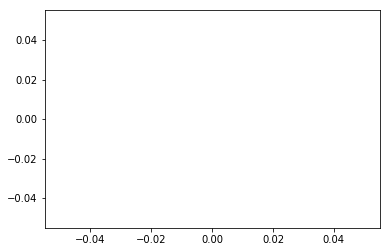

In [294]:
from sklearn.impute import SimpleImputer
#df = pipeline('data/6m-weekly/aapl-6m-weekly.csv', 'aapl')
df = pd.read_csv('data/6m-weekly/aapl-6m-weekly.csv', error_bad_lines=False)
predictor_two(df, 'aapl')